In [2]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

## 垂直駆動アームの角度追従制御

In [3]:
g  = 9.81                # 重力加速度[m/s^2]
l  = 0.2                 # アームの長さ[m]
m  = 0.5                 # アームの質量[kg]
c  = 1.5e-2              # 粘性摩擦係数[kg*m^2/s]
J  = 1.0e-2              # 慣性モーメント[kg*m^2]

P = tf( [0,1], [J, c, m*g*l] )

ref = 30 # 目標角度 [deg]

### P制御

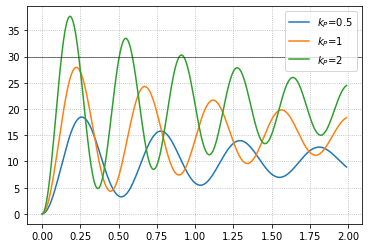

In [24]:
fig, ax = plt.subplots()

kp = (0.5, 1, 2)
for i in range(3):
    K = tf([0, kp[i]], [0, 1])
    Gyr = feedback(P*K, 1)
    y,t = step(Gyr, np.arange(0, 2, 0.01))
    
    ax.plot(t, y*ref, label = '$k_P$='+str(kp[i]))

ax.axhline(ref, color="k", linewidth=0.5)
ax.legend()
ax.grid(ls=':')

#fig.savefig("pcont.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

Text(0.5, 0, '$\\omega$ [rad/s]')

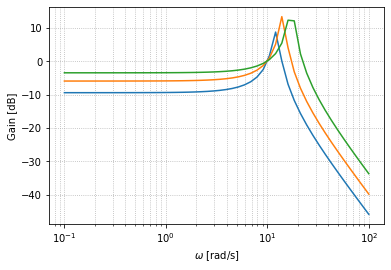

In [18]:
fig, ax = plt.subplots() 

for i in range(len(kp)):
    K = tf([0, kp[i]], [0, 1])
    Gyr = feedback(P*K, 1)
    gain, phase, w = bode(Gyr, logspace(-1,2), Plot=False)
    
    pltargs = {'label': '$k_P$='+str(kp[i])}
    ax.semilogx(w, 20*np.log10(gain), **pltargs)
    
ax.grid(which="both", ls=':')
ax.set_ylabel('Gain [dB]')
ax.set_xlabel('$\omega$ [rad/s]')
        
#fig.savefig("pcont_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### PD制御

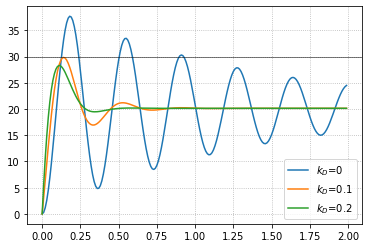

In [26]:
kp = 2
kd = (0, 0.1, 0.2)

fig, ax = plt.subplots()

for i in range(len(kd)):
    K = tf([kd[i], kp], [0, 1])
    Gyr = feedback(P*K, 1)
    y,t = step(Gyr,np.arange(0, 2, 0.01))
    
    pltargs = {'label': '$k_D$='+str(kd[i])}    
    ax.plot(t, y*ref, **pltargs)

ax.axhline(ref, color="k", linewidth=0.5)
ax.legend()
ax.grid(ls=':')

#fig.savefig("pdcont.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

Text(0.5, 0, '$\\omega$ [rad/s]')

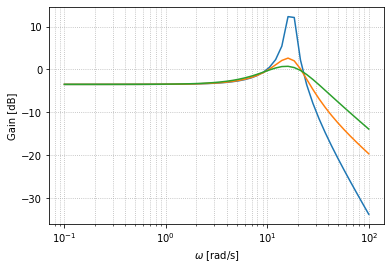

In [30]:
fig, ax = plt.subplots() 

for i in range(len(kd)):
    K = tf([kd[i], kp], [0,1])
    Gyr = feedback(P*K, 1)
    gain, phase, w = bode(Gyr, logspace(-1,2), dB=True, Plot=False)
    
    pltargs = {'label': '$k_D$='+str(kd[i])} 
    ax.semilogx(w, 20*np.log10(gain), **pltargs)
        
ax.grid(which="both", ls=':')
ax.set_ylabel('Gain [dB]')
ax.set_xlabel('$\omega$ [rad/s]')

#fig.savefig("pdcont_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### PID制御

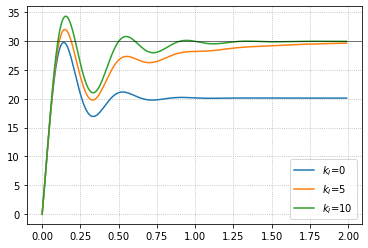

In [34]:
kp = 2
kd = 0.1
ki = (0, 5, 10)

fig, ax = plt.subplots()

for i in range(len(ki)):
    K = tf([kd, kp, ki[i]], [1, 0])
    Gyr = feedback(P*K, 1)
    y, t = step(Gyr, np.arange(0, 2, 0.01))
    
    pltargs = {'label': '$k_I$='+str(ki[i])}    
    ax.plot(t, y*ref, **pltargs)

ax.axhline(ref, color="k", linewidth=0.5) 
ax.legend()
ax.grid(ls=':')

#fig.savefig("pidcont.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

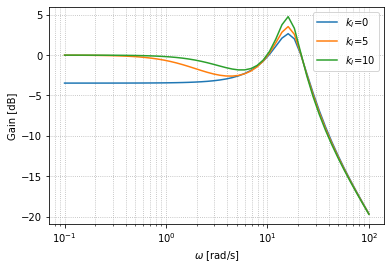

In [39]:
fig, ax = plt.subplots() 

for i in range(len(ki)):
    K = tf([kd, kp, ki[i]], [1, 0])
    Gyr = feedback(P*K,1)
    gain, phase, w = bode(Gyr, logspace(-1,2), Plot=False)
    
    pltargs = {'label': '$k_I$='+str(ki[i])} 
    ax.semilogx(w, 20*np.log10(gain), **pltargs)
        

ax.set_ylabel('Gain [dB]')
ax.set_xlabel('$\omega$ [rad/s]')
ax.legend()
ax.grid(which="both", ls=':')

#fig.savefig("pidcont_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 外乱抑制

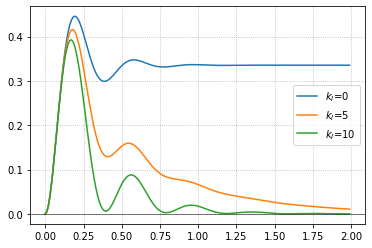

In [48]:
fig, ax = plt.subplots()

for i in range(len(ki)):
    K = tf([kd, kp, ki[i]], [1, 0])
    Gyd = feedback(P, K)
    y, t = step(Gyd, np.arange(0, 2, 0.01))
    
    pltargs = {'label': '$k_I$='+str(ki[i])}    
    ax.plot(t, y, **pltargs)

ax.axhline(0, color="k", linewidth=0.5) 
ax.legend()
ax.grid(ls=':')

#fig.savefig("pidcont_dis.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

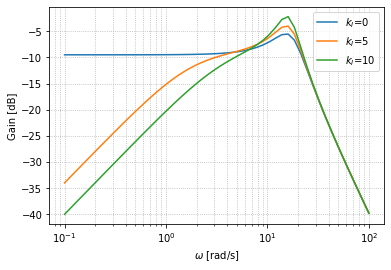

In [50]:
fig, ax = plt.subplots()  

for i in range(len(ki)):
    K = tf([kd, kp, ki[i]], [1,0])
    Gyd = feedback(P, K)
    gain, phase, w = bode(Gyd, logspace(-1,2), Plot=False)
    
    pltargs = {'label': '$k_I$='+str(ki[i])} 
    ax.semilogx(w, 20*np.log10(gain), **pltargs)
        
ax.set_ylabel('Gain [dB]')
ax.set_xlabel('$\omega$ [rad/s]')
ax.legend()
ax.grid(which="both", ls=':')

#fig.savefig("pidcont_dis_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)